In [27]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [28]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Check data retrieved from a test data logger installed in the field
--

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

**This cell is site specific**

In [30]:
# directory = './LowerTeMaari/'
# csvfile = 'Table1.csv'
# loggerfile = directory+csvfile
# dtstart = '2018-08-10T00:20:00'

# directory = './UpperTeMaari/'
# csvfile = 'Table1.csv'
# loggerfile = directory+csvfile
# dtstart = '2018-10-08T23:50:00'

# directory = './Inferno/'
# csvfile = 'Table1.csv'
# loggerfile = directory+csvfile
# dtstart = '2017-12-06T00:30:00'

# directory = './RuapehuCraterLake/'
# csvfile = 'Table1.csv'
# loggerfile = directory+csvfile
# dtstart = '2018-05-04T04:00:00'

# directory = './Fumarole13/'
# csvfile = 'Table1.csv'
# loggerfile = directory+csvfile
# dtstart = '2017-12-06T00:30:00'

directory = './FoxLandslide/'
csvfile = 'Table1.csv'
loggerfile = directory+csvfile
dtstart = '2019-01-17T23:10:00'

**Read data**

In [31]:
df = pd.read_csv(loggerfile, parse_dates=True, index_col = 'Datetime')

#Use only data after logger was installed
data = df[df.index>=dtstart]

In [32]:
data.head()

,RecNbr,LoggerName,SupplyVolts,LithiumVolts,PTemp_degC,Rain1_mm_Tot,Rain2_mm_Tot,nmbr_satellites_Avg,latitude_a,latitude_b,longitude_a,longitude_b,speed,course,altitude
Datetime,,,,,,,,,,,,,,,
2019-01-17 23:10:00,4,FoxLandslide,12.89,3.673,26.160000,0.0,0.0,4.5,-41,-11.7799,174,55.9969,0,224.6,16.4
2019-01-17 23:20:00,5,FoxLandslide,12.90,3.671,26.250000,0.0,0.0,9.0,-41,-11.7799,174,55.9969,0,224.6,16.4
2019-01-17 23:30:00,6,FoxLandslide,12.89,3.670,26.330000,0.0,0.0,9.0,-41,-11.7799,174,55.9969,0,224.6,16.4
2019-01-17 23:40:00,7,FoxLandslide,12.90,3.672,26.440001,0.0,0.0,9.0,-41,-11.7799,174,55.9969,0,224.6,16.4
2019-01-17 23:50:00,8,FoxLandslide,12.89,3.671,26.670000,0.0,0.0,9.0,-41,-11.7799,174,55.9969,0,224.6,16.4


**Voltages**

(11, 15)

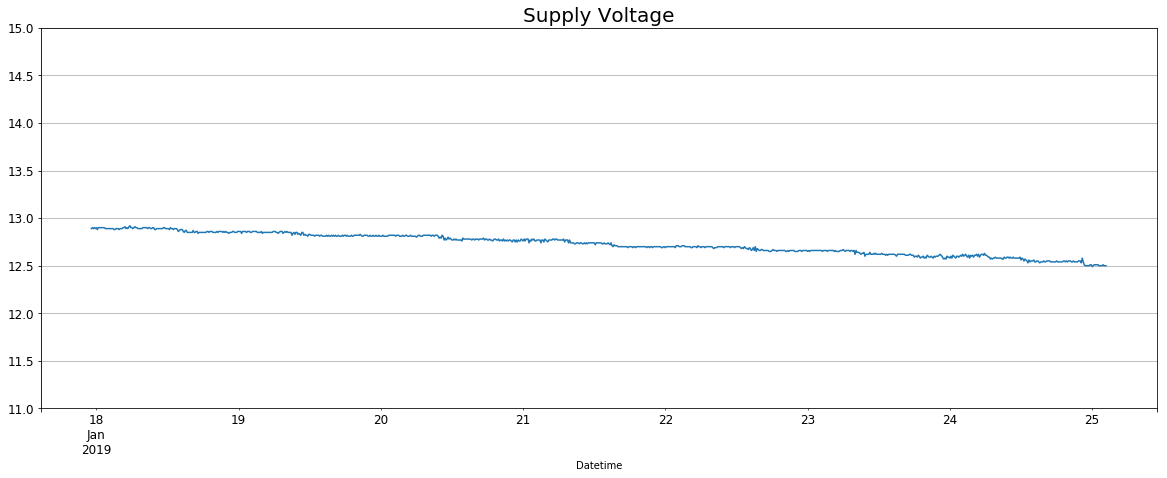

In [33]:
vol = data['SupplyVolts'].plot(figsize=(20,7), title='Supply Voltage', label='supply volts', fontsize=12)
#data['LithiumVolts'].plot(ax=vol, label='lithium volts')
vol.title.set_size(20)
vol.grid()
vol.set_ylim(11,15)
# vol.set_ylabel("Voltage")
# vol.legend(loc='best')

In [34]:
fig = vol.get_figure()
fig.savefig(directory+'field_logger_voltage.png', dpi=100, bbox_inches='tight')

**Temperatures**

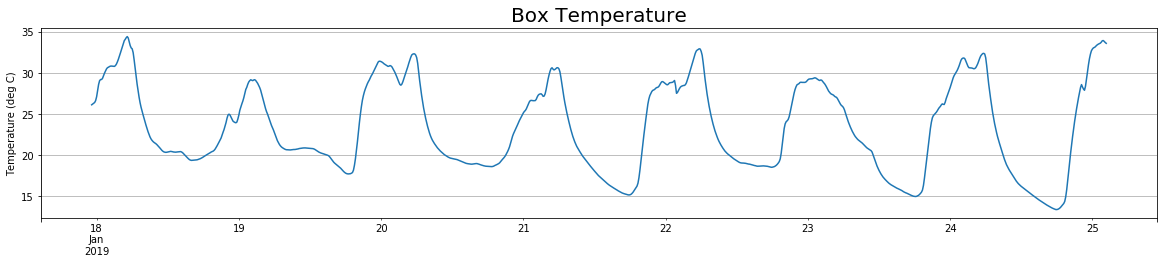

In [35]:
if directory == './Fumarole13/':
    fig,(ax0,ax1,ax2) = plt.subplots(3, 1, figsize=(20,7))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    data['Temp_PRT1_degC'].plot(ax=ax0, title='Observation Temperature 1')
    ax0.title.set_size(20)
    ax0.grid()
    ax0.set_ylabel('Temperature (deg C)')
    ax0.set_xlabel('')
    
    data['Temp_PRT2_degC'].plot(ax=ax1, title='Observation Temperature 2')
    ax1.title.set_size(20)
    ax1.grid()
    ax1.set_ylabel('Temperature (deg C)')
    ax1.set_xlabel('')

    data['PTemp_degC'].plot(ax=ax2, title='Box Temperature', label='box')
    ax2.title.set_size(20)
    ax2.grid()
    ax2.set_ylabel('Temperature (deg C)')
    ax2.set_xlabel('')
    
    data['Temp_thermocouple_degC'].plot(ax=ax2, label='co-located thermocouple')
    ax2.legend(loc='best')
    
elif directory == './UpperTeMaari/':
    fig,(ax0,ax1,ax2) = plt.subplots(3, 1, figsize=(20,7))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    data['Temp_PRT1_degC'].plot(ax=ax0, title='Temperature Eastern Feature')
    ax0.title.set_size(20)
    ax0.grid()
    ax0.set_ylabel('Temperature (deg C)')
    ax0.set_xlabel('')
    
    data['Temp_PRT2_degC'].plot(ax=ax1, title='Temperature Southern Feature', label='PRT')
    ax1.title.set_size(20)
    ax1.grid()
    ax1.set_ylabel('Temperature (deg C)')
        
    data['Temp_thermocouple1_degC'].plot(ax=ax1, label='HiT thermocouple')
    ax1.legend(loc='best')
    ax1.set_xlabel('')

    data['PTemp_degC'].plot(ax=ax2, title='Box Temperature')
    ax2.title.set_size(20)
    ax2.grid()
    ax2.set_ylabel('Temperature (deg C)')
    ax2.set_xlabel('')     
    
elif directory == './FoxLandslide/':
    fig,(ax0) = plt.subplots(1, 1, figsize=(20,3.5))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    data['PTemp_degC'].plot(ax=ax0, title='Box Temperature')
    ax0.title.set_size(20)
    ax0.grid()
    ax0.set_ylabel('Temperature (deg C)')
    ax0.set_xlabel('')
    
else:
    fig,(ax0,ax1) = plt.subplots(2, 1, figsize=(20,7))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    data['Temp_PRT_degC'].plot(ax=ax0, title='Observation Temperature')
    ax0.title.set_size(20)
    ax0.grid()
    ax0.set_ylabel('Temperature (deg C)')
    ax0.set_xlabel('')

    data['PTemp_degC'].plot(ax=ax1, title='Box Temperature')
    ax1.title.set_size(20)
    ax1.grid()
    ax1.set_ylabel('Temperature (deg C)')
    ax1.set_xlabel('');

fig.savefig(directory+'field_logger_temperature.png', dpi=100, bbox_inches='tight')

**Depth**

In [36]:
if (directory == './Inferno/' or directory == './RuapehuCraterLake/'):
    dep = data['Depth_USGS_OTT_meters'].plot(figsize=(20,7), title='Water Depth Above Sensor',fontsize=12)
    dep.title.set_size(20)
    dep.grid()
    dep.set_ylabel("Depth (m)")

    fig = dep.get_figure()
    fig.savefig(directory+'field_logger_depth.png', dpi=100, bbox_inches='tight')

In [37]:
if directory == './Inferno/':
    data[data['Depth_USGS_OTT_meters']>12]

**Rainfall**

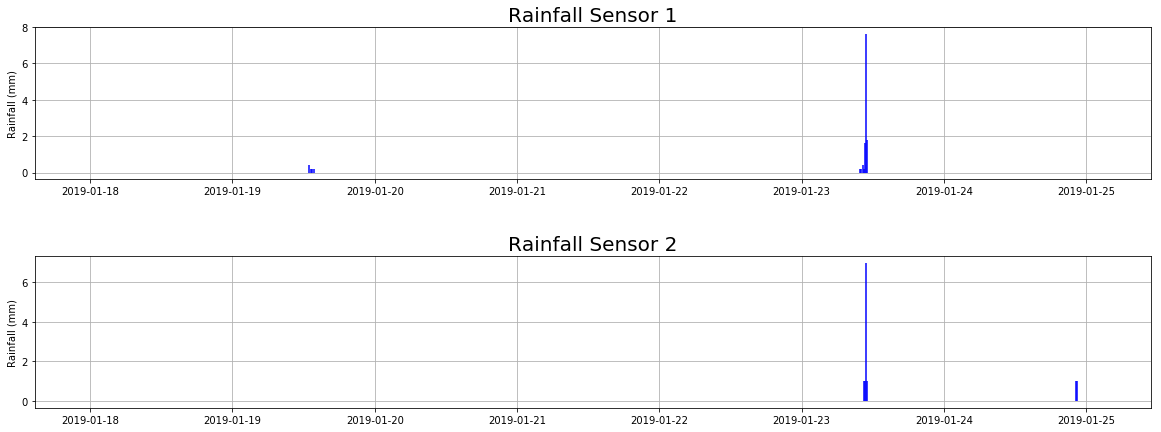

In [38]:
if (directory == './FoxLandslide/'):
    fig,(ax0,ax1) = plt.subplots(2, 1, figsize=(20,7))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    ax0.vlines(data.index, ymax=data['Rain1_mm_Tot'], ymin=0, color='blue')
    ax0.set_ylabel('Rainfall (mm)')
    ax0.set_title('Rainfall Sensor 1')
    ax0.title.set_size(20)
    ax0.grid()

    ax1.vlines(data.index, ymax=data['Rain2_mm_Tot'], ymin=0, color='blue')
    ax1.set_ylabel('Rainfall (mm)')
    ax1.set_title('Rainfall Sensor 2')
    ax1.title.set_size(20)
    ax1.grid()

    fig.savefig(directory+'field_logger_rain.png', dpi=100, bbox_inches='tight')

**Position**